In [1]:
import warnings
warnings.filterwarnings("ignore")

# GPU 사용 설정
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '1'

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 일렬로 만드는건 CNN에선 아예 안쓰지만 일단 표준화후 일렬로 만들자
train_scaled = train_input / 255.0

# train과 valid 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [3]:
# Model 함수 구현
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100,activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))
    return model

In [4]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10)

Epoch 1/10


2022-07-20 16:48:59.834943: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1500/1500 [==============================] - 1s 772us/step - loss: 0.5358 - accuracy: 0.8102
Epoch 2/10
1500/1500 [==============================] - 1s 758us/step - loss: 0.3943 - accuracy: 0.8581
Epoch 3/10
1500/1500 [==============================] - 1s 797us/step - loss: 0.3569 - accuracy: 0.8718
Epoch 4/10
1500/1500 [==============================] - 1s 680us/step - loss: 0.3346 - accuracy: 0.8794
Epoch 5/10
1500/1500 [==============================] - 1s 686us/step - loss: 0.3204 - accuracy: 0.8847
Epoch 6/10
1500/1500 [==============================] - 1s 681us/step - loss: 0.3130 - accuracy: 0.8885
Epoch 7/10
1500/1500 [==============================] - 1s 710us/step - loss: 0.2989 - accuracy: 0.8935
Epoch 8/10
1500/1500 [==============================] - 1s 808us/step - loss: 0.2906 - accuracy: 0.8983
Epoch 9/10
1500/1500 [==============================] - 1s 700us/step - loss: 0.2835 - accuracy: 0.9004
Epoch 10/10
1500/1500 [==============================] - 1s 681us/step - lo

In [6]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

## 손실곡선

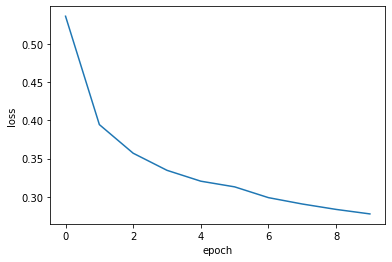

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 정확도 곡선

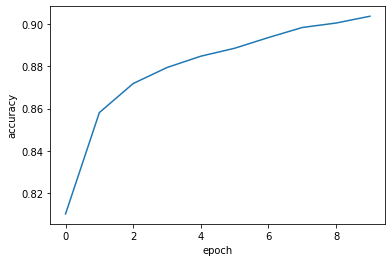

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

---
## 반복 훈련의 증가

In [9]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 1s 668us/step - loss: 0.5337 - accuracy: 0.8116
Epoch 2/20
1500/1500 [==============================] - 1s 660us/step - loss: 0.3953 - accuracy: 0.8582
Epoch 3/20
1500/1500 [==============================] - 1s 694us/step - loss: 0.3568 - accuracy: 0.8720
Epoch 4/20
1500/1500 [==============================] - 1s 669us/step - loss: 0.3340 - accuracy: 0.8795
Epoch 5/20
1500/1500 [==============================] - 1s 673us/step - loss: 0.3202 - accuracy: 0.8866
Epoch 6/20
1500/1500 [==============================] - 1s 660us/step - loss: 0.3085 - accuracy: 0.8896
Epoch 7/20
1500/1500 [==============================] - 1s 662us/step - loss: 0.2979 - accuracy: 0.8942
Epoch 8/20
1500/1500 [==============================] - 1s 663us/step - loss: 0.2869 - accuracy: 0.8983
Epoch 9/20
1500/1500 [==============================] - 1s 762us/step - loss: 0.2827 - accuracy: 0.9001
Epoch 10/20
1500/1500 [==============================] - 1s 812u

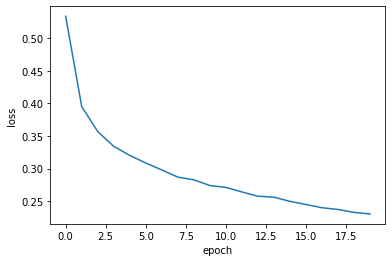

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

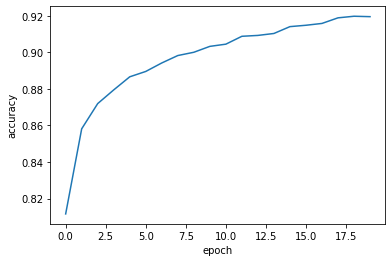

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

---
### 검증 손실
- 검증 세트에 대한 정확도를 파악하기위해 validataion data를 사용한다.

In [12]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target)#fitting 할때 train과 val을 한번에 같이 가능
                    )

Epoch 1/20
1500/1500 [==============================] - 1s 875us/step - loss: 0.5325 - accuracy: 0.8124 - val_loss: 0.4720 - val_accuracy: 0.8255
Epoch 2/20
1500/1500 [==============================] - 1s 925us/step - loss: 0.3913 - accuracy: 0.8598 - val_loss: 0.4086 - val_accuracy: 0.8566
Epoch 3/20
1500/1500 [==============================] - 1s 801us/step - loss: 0.3556 - accuracy: 0.8707 - val_loss: 0.3690 - val_accuracy: 0.8729
Epoch 4/20
1500/1500 [==============================] - 1s 817us/step - loss: 0.3368 - accuracy: 0.8797 - val_loss: 0.3622 - val_accuracy: 0.8716
Epoch 5/20
1500/1500 [==============================] - 1s 898us/step - loss: 0.3179 - accuracy: 0.8856 - val_loss: 0.3707 - val_accuracy: 0.8766
Epoch 6/20
1500/1500 [==============================] - 1s 773us/step - loss: 0.3094 - accuracy: 0.8885 - val_loss: 0.3600 - val_accuracy: 0.8782
Epoch 7/20
1500/1500 [==============================] - 1s 765us/step - loss: 0.2974 - accuracy: 0.8951 - val_loss: 0.3823 -

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

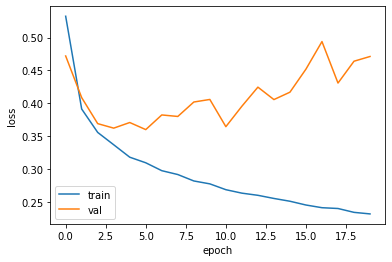

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

> 훈련세트는 epochs가 증가함에 따라 손실이 떨어지고 있으나  
> 검증세트는 epochs의 증가에 따라 초반에는 손실이 떨어지나 진행하면 할수록 손실율이 증가한다.  
> 이 모델은 훈련세트에는 정확도가 높아 좋지만, 검증세트에는 적합하지 않는 과대적합 모델이다.  
> 엄청난 과대적합!

---
## Optimizer(최적화 알고리즘)를 써보자

- Optimizer (adam)

In [15]:
model = model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target)#fitting 할때 train과 val을 한번에 같이 가능
                    )

Epoch 1/20
1500/1500 [==============================] - 1s 738us/step - loss: 0.5159 - accuracy: 0.8207 - val_loss: 0.4649 - val_accuracy: 0.8373
Epoch 2/20
1500/1500 [==============================] - 1s 746us/step - loss: 0.3923 - accuracy: 0.8592 - val_loss: 0.3622 - val_accuracy: 0.8711
Epoch 3/20
1500/1500 [==============================] - 1s 810us/step - loss: 0.3534 - accuracy: 0.8719 - val_loss: 0.3464 - val_accuracy: 0.8752
Epoch 4/20
1500/1500 [==============================] - 1s 817us/step - loss: 0.3286 - accuracy: 0.8801 - val_loss: 0.3454 - val_accuracy: 0.8749
Epoch 5/20
1500/1500 [==============================] - 1s 739us/step - loss: 0.3068 - accuracy: 0.8885 - val_loss: 0.3314 - val_accuracy: 0.8809
Epoch 6/20
1500/1500 [==============================] - 1s 818us/step - loss: 0.2887 - accuracy: 0.8947 - val_loss: 0.3228 - val_accuracy: 0.8827
Epoch 7/20
1500/1500 [==============================] - 1s 757us/step - loss: 0.2772 - accuracy: 0.8976 - val_loss: 0.3579 -

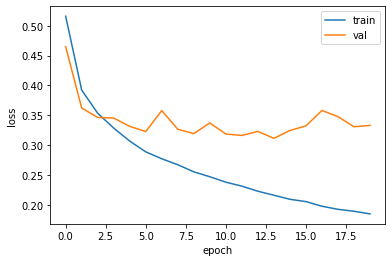

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

> 훈련세트는 epochs가 증가함에 따라 손실이 떨어지고 있으나  
> 검증세트는 epochs의 증가에 따라 초반에는 손실이 떨어지나 진행하면 할수록 손실율이 증가한다.  
> 이 모델은 훈련세트에는 정확도가 높아 좋지만, 검증세트에는 적합하지 않는 과대적합 모델이다.  
> Optimizer(최적화 알고리즘)을 사용한 것이 좀 더 나은 모델이나 검증손실에 대한 부분(과대적합)은 아직 해결이 안됨

---
# Dropout
- 규제
- 신경망 모델에만 있음
- '훈련시'에만 각 Sample을 처리할때 은닉층의 임의의 node를 계산에 포함시키지 않는다.
- (임의로 노드를 하나 빼서 계산하는거야)

In [17]:
# model에 dropout을 추가
model = model_fn(keras.layers.Dropout(0.3)) # drop out을 30%해라 그럼 70% 가지고 공부를 함,
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


> dropout 층이 추가가 되었다.

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target)#fitting 할때 train과 val을 한번에 같이 가능
                    )

Epoch 1/20
1500/1500 [==============================] - 1s 790us/step - loss: 0.5908 - accuracy: 0.7928 - val_loss: 0.4352 - val_accuracy: 0.8425
Epoch 2/20
1500/1500 [==============================] - 1s 737us/step - loss: 0.4385 - accuracy: 0.8429 - val_loss: 0.4016 - val_accuracy: 0.8535
Epoch 3/20
1500/1500 [==============================] - 1s 751us/step - loss: 0.4020 - accuracy: 0.8555 - val_loss: 0.3834 - val_accuracy: 0.8609
Epoch 4/20
1500/1500 [==============================] - 1s 822us/step - loss: 0.3783 - accuracy: 0.8620 - val_loss: 0.3576 - val_accuracy: 0.8699
Epoch 5/20
1500/1500 [==============================] - 1s 761us/step - loss: 0.3669 - accuracy: 0.8661 - val_loss: 0.3501 - val_accuracy: 0.8701
Epoch 6/20
1500/1500 [==============================] - 1s 829us/step - loss: 0.3514 - accuracy: 0.8705 - val_loss: 0.3379 - val_accuracy: 0.8763
Epoch 7/20
1500/1500 [==============================] - 1s 825us/step - loss: 0.3419 - accuracy: 0.8742 - val_loss: 0.3372 -

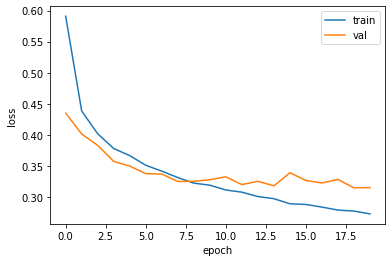

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

> epochs가 10일 경우가 train과 val의 차이가 적은 것 같다.   
> 기본적으로 훈련세트의 손실이 검증세트보다 적게 나오는 epochs의 갯수를 선택한다.

---
## 모델의 저장과 복원
- hdf5 format으로 저장

In [20]:
# model 저장
model.save("../Data/model-whole.h5")

> 어떤 모델을 쓸지 고민일때 저장을 많이함

In [21]:
# model 복원
model = keras.models.load_model("../Data/model-whole.h5")

In [22]:
# 사용
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 389us/step - loss: 0.3156 - accuracy: 0.8864


[0.3155819773674011, 0.8864166736602783]

---
# ***** Callbacks
- 훈련수행시 손실값이 제일 작은 함수를 저장해 준다. <- 굉장히 편함

In [23]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-model.h5")

model.fit(train_scaled, train_target, epochs=20,validation_data=(val_scaled, val_target),
          callbacks = [checkpoint_cb]  
         )

Epoch 1/20
1500/1500 [==============================] - 1s 871us/step - loss: 0.5948 - accuracy: 0.7909 - val_loss: 0.4301 - val_accuracy: 0.8472
Epoch 2/20
1500/1500 [==============================] - 1s 760us/step - loss: 0.4423 - accuracy: 0.8406 - val_loss: 0.3931 - val_accuracy: 0.8536
Epoch 3/20
1500/1500 [==============================] - 1s 811us/step - loss: 0.4041 - accuracy: 0.8533 - val_loss: 0.3696 - val_accuracy: 0.8653
Epoch 4/20
1500/1500 [==============================] - 1s 837us/step - loss: 0.3816 - accuracy: 0.8603 - val_loss: 0.3578 - val_accuracy: 0.8688
Epoch 5/20
1500/1500 [==============================] - 1s 789us/step - loss: 0.3667 - accuracy: 0.8646 - val_loss: 0.3439 - val_accuracy: 0.8727
Epoch 6/20
1500/1500 [==============================] - 1s 738us/step - loss: 0.3554 - accuracy: 0.8691 - val_loss: 0.3373 - val_accuracy: 0.8774
Epoch 7/20
1500/1500 [==============================] - 1s 815us/step - loss: 0.3459 - accuracy: 0.8724 - val_loss: 0.3318 -

In [24]:
model = keras.models.load_model("../Data/best-model.h5")
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 394us/step - loss: 0.3314 - accuracy: 0.8812


[0.33142560720443726, 0.8811666369438171]

---
# ***** Early-Stopping(조기종료)
- Callback처럼 끝까지 기다리는 것이 아니고 hyper parameter을 선정하여 한계값을 정해 실행한다.
- hyper parameter는 몇번까지 참는지를 정해줘 => patience
- restore_best_weights = True (가중치값)은 무조건 적어줘야해 이걸 안적어주면 끝낸자리의 값을 저장함.

In [25]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-model.h5")

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,validation_data=(val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb]  
                    )

Epoch 1/20
1500/1500 [==============================] - 1s 807us/step - loss: 0.5896 - accuracy: 0.7921 - val_loss: 0.4370 - val_accuracy: 0.8389
Epoch 2/20
1500/1500 [==============================] - 1s 722us/step - loss: 0.4402 - accuracy: 0.8420 - val_loss: 0.3930 - val_accuracy: 0.8557
Epoch 3/20
1500/1500 [==============================] - 1s 900us/step - loss: 0.4011 - accuracy: 0.8539 - val_loss: 0.3662 - val_accuracy: 0.8629
Epoch 4/20
1500/1500 [==============================] - 1s 801us/step - loss: 0.3791 - accuracy: 0.8631 - val_loss: 0.3789 - val_accuracy: 0.8637
Epoch 5/20
1500/1500 [==============================] - 1s 723us/step - loss: 0.3631 - accuracy: 0.8680 - val_loss: 0.3532 - val_accuracy: 0.8701
Epoch 6/20
1500/1500 [==============================] - 1s 746us/step - loss: 0.3501 - accuracy: 0.8720 - val_loss: 0.3530 - val_accuracy: 0.8711
Epoch 7/20
1500/1500 [==============================] - 1s 853us/step - loss: 0.3421 - accuracy: 0.8750 - val_loss: 0.3363 -

In [26]:
# 몇번째 epoch에서 stop 되었는가?
early_stopping_cb.stopped_epoch

8

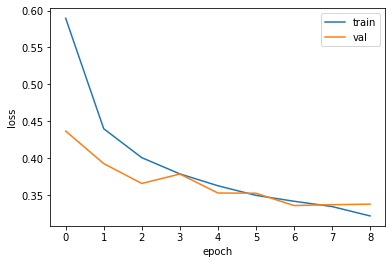

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()